In [1]:
import numpy as np
import os
from matplotlib.pyplot import *
import ueye

# Compare performance on different datasets
Comparison against Coder 1

In [2]:
import pandas as pd
import numpy as np
K = 10
df = pd.DataFrame(columns=['ID','fold','kappa','f1','on_dist','off_dist'])
df_human = pd.DataFrame(columns=['ID','fold','kappa','f1','on_dist','off_dist'])
folders = ['dataset1','dataset2','dataset3']
sampfreq = [1000,1000,500]
min_dist = [10,5,10]
min_sacc_dur = 6
Ntrain = [950,950,330]
for idata,f in enumerate(folders):
    
    ntrain = Ntrain[idata]
    fac = 1000/sampfreq[idata]
    datapath = os.path.join('../data',f)
    print(datapath)
    # load training data
    X = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq[idata])+'hz_X_train.csv',delimiter=',')
    Y = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq[idata])+'hz_Y_train.csv',delimiter=',')
    L = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq[idata])+'hz_Labels_train.csv',delimiter=',')
    if f == 'dataset1':
        L2 = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq[idata])+'hz_Labels2_train.csv',delimiter=',')
        # load labels from coder2
    
    np.random.seed(1)
    randind = np.random.permutation(X.shape[0])
    # used as training data
    Xtrain = X[randind[:ntrain],:]
    Ytrain = Y[randind[:ntrain],:]
    Ltrain = L[randind[:ntrain],:]
    if f =='dataset1':
        Ltrain2 = L2[randind[:ntrain],:]
    
    # chose subset that was not used for training for each crossvalidation
    n_test = int(ntrain/K)
    np.random.seed(1) # fixed seed for comparable cross validations
    indices = np.random.permutation(ntrain)
     
    for i in range(K):
        if i==K-1:
            ind_test = indices[n_test*i:]
        else:
            ind_test = indices[n_test*i:n_test*(i+1)]
        # test set
        Xtest = Xtrain[ind_test,:].copy()
        Ytest = Ytrain[ind_test,:].copy()
        Ltest = Ltrain[ind_test,:].copy()
        if f == 'dataset1':
            Ltest2 = Ltrain2[ind_test,:].copy()

        model = ueye.DNN(weights_name='crossvalidation/'+f+'/crossvalidation_'+str(i),
                        min_sacc_dur = min_sacc_dur, min_sacc_dist = min_dist[idata],
                        sampfreq = sampfreq[idata])
        pred,prob,perf = model.test(Xtest,Ytest,Ltest)
        

        df = df.append({'ID':f,
                        'fold':i,
                        'kappa':perf['kappa'],
                        'f1':perf['f1'],
                        'on_dist':np.mean(np.abs(perf['on']))*fac,
                        'off_dist':np.mean(np.abs(perf['off']))*fac},ignore_index=True) 
        #Note: scale onset and offset distance with sampfreq
        if f == 'dataset1': #for dataset1, compare inter-rater performance
        
            # compare coder 1 against coder 2
            kappa = ueye.functions.binary_cohens_kappa(Ltest.astype(float).flatten(),Ltest2.astype(float).flatten())
            true_pos,false_pos,false_neg,on_distance,off_distance = ueye.functions.accuracy(Ltest.astype(float),Ltest2.astype(float))
            f1 = (2 * true_pos)/(2 * true_pos + false_neg + false_pos)  
            on = np.mean(np.abs(on_distance))*fac
            off = np.mean(np.abs(off_distance))*fac
            
            df_human = df_human.append({'ID':f,
                        'fold':i,
                        'kappa':kappa,
                        'f1':f1,
                        'on_dist':on,
                        'off_dist':off},ignore_index=True)
        
#display(df)

df2 = pd.DataFrame(columns=['ID','kappa_m','kappa_std','f1_m','f1_std',
                            'on_dist_m','on_dist_std',
                            'off_dist_m','off_dist_std'])

# average over crossvalidations
for k in folders:
    df2 = df2.append({'ID':k,
                     'kappa_m':df[df['ID']==k]['kappa'].mean(),
                      'kappa_std':df[df['ID']==k]['kappa'].std(),
                      'f1_m':df[df['ID']==k]['f1'].mean(),
                      'f1_std':df[df['ID']==k]['f1'].std(),
                      'on_dist_m':np.abs(df[df['ID']==k]['on_dist']).mean(),
                      'on_dist_std':np.abs(df[df['ID']==k]['on_dist']).std(),
                      'off_dist_m':np.abs(df[df['ID']==k]['off_dist']).mean(),
                      'off_dist_std':np.abs(df[df['ID']==k]['off_dist']).std(),
                     },ignore_index=True)
    
print("Averaged scores for U'n'Eye")
display(df2)

print("Agreement of coder 1 and 2")
display(df_human)

../data/dataset1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:1946: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


Binary Cohens Kappa:  0.884
F1: 0.962
Binary Cohens Kappa:  0.905
F1: 0.966
Binary Cohens Kappa:  0.881
F1: 0.953
Binary Cohens Kappa:  0.899
F1: 0.977
Binary Cohens Kappa:  0.871
F1: 0.949
Binary Cohens Kappa:  0.899
F1: 0.947
Binary Cohens Kappa:  0.855
F1: 0.953
Binary Cohens Kappa:  0.903
F1: 0.973
Binary Cohens Kappa:  0.904
F1: 0.965
Binary Cohens Kappa:  0.915
F1: 0.978
../data/dataset2
Binary Cohens Kappa:  0.913
F1: 0.944
Binary Cohens Kappa:  0.922
F1: 0.976
Binary Cohens Kappa:  0.922
F1: 0.941
Binary Cohens Kappa:  0.911
F1: 0.951
Binary Cohens Kappa:  0.932
F1: 0.975
Binary Cohens Kappa:  0.946
F1: 0.977
Binary Cohens Kappa:  0.911
F1: 0.942
Binary Cohens Kappa:  0.913
F1: 0.969
Binary Cohens Kappa:  0.929
F1: 0.968
Binary Cohens Kappa:  0.913
F1: 0.952
../data/dataset3
Binary Cohens Kappa:  0.818
F1: 0.934
Binary Cohens Kappa:  0.808
F1: 0.928
Binary Cohens Kappa:  0.824
F1: 0.95
Binary Cohens Kappa:  0.816
F1: 0.951
Binary Cohens Kappa:  0.804
F1: 0.936
Binary Cohens Kap

,ID,kappa_m,kappa_std,f1_m,f1_std,on_dist_m,on_dist_std,off_dist_m,off_dist_std
0,dataset1,0.891790,0.018429,0.962253,0.011673,2.656528,0.338675,4.108999,0.407164
1,dataset2,0.921353,0.011470,0.959444,0.014793,1.697520,0.289349,2.189707,0.372963
2,dataset3,0.818414,0.010436,0.939044,0.014512,2.301117,0.272338,3.879420,0.540275


Agreement of coder 1 and 2


,ID,fold,kappa,f1,on_dist,off_dist
0,dataset1,0,0.835380,0.964497,4.055215,7.098160
1,dataset1,1,0.847079,0.965909,2.964706,7.100000
2,dataset1,2,0.823443,0.978852,3.611111,6.901235
3,dataset1,3,0.845063,0.979943,4.187135,6.994152
4,dataset1,4,0.815050,0.974930,3.314286,7.417143
5,dataset1,5,0.835457,0.983333,3.666667,7.683616
6,dataset1,6,0.767944,0.953216,3.981595,7.269939
7,dataset1,7,0.840935,0.986450,3.994505,6.450549
8,dataset1,8,0.845973,0.985075,3.957576,6.842424
9,dataset1,9,0.846980,0.994475,3.472222,7.205556


In [3]:
import pandas as pd
import numpy as np


df3 = pd.DataFrame(columns=['Algorithm','fold','ID','kappa','f1','on_dist','off_dist'])
for ind,row in df.iterrows():
    df3 = df3.append({'Algorithm':'uneye',
           'ID':row['ID'],
           'fold':row['fold'],
           'kappa':row['kappa'],
           'f1':row['f1'],
           'on_dist':row['on_dist'],
           'off_dist':row['off_dist'],},ignore_index=True)

for ind,row in df_human.iterrows():
    df3 = df3.append({'Algorithm':'human',
           'ID':row['ID'],
           'fold':row['fold'],
           'kappa':row['kappa'],
           'f1':row['f1'],
           'on_dist':row['on_dist'],
           'off_dist':row['off_dist'],},ignore_index=True)

for i,f in enumerate(folders):
    fac = 1000/sampfreq[i]
    perf = np.load('summary/crossvalidation/em_'+f+'.npy').item()

    for i in range(10):
         df3 = df3.append({'Algorithm':'em',
             'ID':f,
            'fold':i,
             'kappa':perf['kappa'][i],
             'f1':perf['f1'][i],
             'on_dist':np.mean(np.abs(perf['on'][i])*fac),
             'off_dist':np.mean(np.abs(perf['off'][i]))*fac},ignore_index=True)


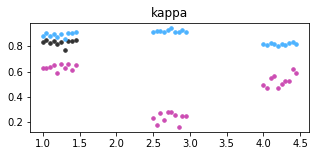

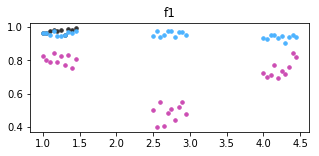

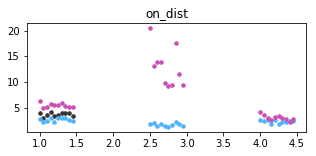

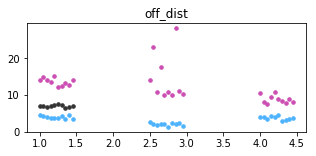

,algorithm,dataset,value,mean,std
0,human,dataset1,kappa,0.830330,0.024396
1,uneye,dataset1,kappa,0.891790,0.018429
2,em,dataset1,kappa,0.634242,0.021470
3,uneye,dataset2,kappa,0.921353,0.011470
4,em,dataset2,kappa,0.234966,0.041175
5,uneye,dataset3,kappa,0.818414,0.010436
6,em,dataset3,kappa,0.530323,0.049561
7,human,dataset1,f1,0.976668,0.012294
8,uneye,dataset1,f1,0.962253,0.011673
9,em,dataset1,f1,0.805056,0.028549


In [4]:
# plot performances
from matplotlib.pyplot import *
colors = [[0.2,0.2,0.2],[0.3,0.7,1],[0.8,0.3,0.7]]
value = ['kappa','f1','on_dist','off_dist']
df_averaged = pd.DataFrame(columns=['algorithm','dataset','value','mean','std'])
for v in value:
    fig = figure(figsize=(5,2))
    # Cohens Kappa

    start = 1
    data = 0
    for f in folders:
        if f =='dataset1':
            algorithms = ['human','uneye','em']
        else:
            algorithms = ['uneye','em']
        for j,a in enumerate(algorithms):

            if f!='dataset1':
                j+=1
            for i in range(10):
                plot(start+i*.05,np.array(df3[v][df3['ID']==f][df3['fold']==i][df3['Algorithm']==a]),
                     marker='.',linewidth=0,c=colors[j],markersize=7)
            df_averaged = df_averaged.append({'algorithm':a,
                                             'dataset':f,
                                             'value':v,
                                              'mean':df3[v][df3['ID']==f][df3['Algorithm']==a].mean(),
                                              'std':df3[v][df3['ID']==f][df3['Algorithm']==a].std()
                                             },ignore_index=True)
        
        start += 1.5
        data += 2
    title(v)
    show()


display(df_averaged)

# inter-rater comparison

In [5]:
#load weights from 10-fold cross validation, either trained with labels from coder 1 and coder 2 and evaluate
# their performance on labels from both coders
import ueye
import numpy as np
import os

import pandas as pd
import numpy as np
K = 10
df = pd.DataFrame(columns=['training','test','fold','kappa','f1','on_dist','off_dist'])
f = 'dataset1'
datapath = os.path.join('../data',f)
sampfreq = 1000
min_dist = 10
min_sacc_dur = 6
ntrain = 950
weights = ['crossvalidation/dataset1/crossvalidation_','crossvalidation/dataset1_coder2/crossvalidation_']
coders = 2

# load training data
X = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq)+'hz_X_train.csv',delimiter=',')
Y = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq)+'hz_Y_train.csv',delimiter=',')
L1 = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq)+'hz_Labels_train.csv',delimiter=',')
L2 = np.loadtxt(datapath+'/'+f+'_'+str(sampfreq)+'hz_Labels2_train.csv',delimiter=',')
np.random.seed(1)
randind = np.random.permutation(X.shape[0])
# used as training data
Xtrain = X[randind[:ntrain],:]
Ytrain = Y[randind[:ntrain],:]
Ltrain1 = L1[randind[:ntrain],:]
Ltrain2 = L2[randind[:ntrain],:]

# chose subset that was not used for training for each crossvalidation
n_test = int(ntrain/K)
np.random.seed(1) # fixed seed for comparable cross validations
indices = np.random.permutation(ntrain)
    
    
for j,w in enumerate(weights):
    for c in range(1,coders+1):

        if c==1:
            L = L1.copy()
            # load labels fro coder1
        else:
            L = L2.copy()
            # load labels from coder2
        Ltrain = L[randind[:ntrain],:]
        
         
        for i in range(K):
            if i==K-1:
                ind_test = indices[n_test*i:]
            else:
                ind_test = indices[n_test*i:n_test*(i+1)]
            # test set
            Xtest = Xtrain[ind_test,:].copy()
            Ytest = Ytrain[ind_test,:].copy()
            Ltest = Ltrain[ind_test,:].copy()
            
            # test network with given weights on labels from given coder
            model = ueye.DNN(weights_name=w+str(i),
                            min_sacc_dur = min_sacc_dur, min_sacc_dist = min_dist,
                            sampfreq = sampfreq)
            pred,prob,perf = model.test(Xtest,Ytest,Ltest)
            
    
            df = df.append({'training':'coder '+str(j+1),
                            'test':'coder '+str(c),
                            'fold':i,
                            'kappa':perf['kappa'],
                            'f1':perf['f1'],
                            'on_dist':np.mean(np.abs(perf['on'])),
                            'off_dist':np.mean(np.abs(perf['off']))},ignore_index=True) 
    
df2 = pd.DataFrame(columns=['training','test','kappa_m','kappa_std','f1_m','f1_std',
                            'on_dist_m','on_dist_std',
                            'off_dist_m','off_dist_std'])

# average over crossvalidations
for j in range(2):
    for c in range(2):
        df_sub = df[df['training']=='coder '+str(j+1)]
        df_sub = df_sub[df_sub['test']=='coder '+str(c+1)]
        df2 = df2.append({'training':'coder '+str(j+1),
                      'test':'coder '+str(c+1),
                     'kappa_m':df_sub['kappa'].mean(),
                      'kappa_std':df_sub['kappa'].std(),
                      'f1_m':df_sub['f1'].mean(),
                      'f1_std':df_sub['f1'].std(),
                      'on_dist_m':np.abs(df_sub['on_dist']).mean(),
                      'on_dist_std':np.abs(df_sub['on_dist']).std(),
                      'off_dist_m':np.abs(df_sub['off_dist']).mean(),
                      'off_dist_std':np.abs(df_sub['off_dist']).std(),
                     },ignore_index=True)
    
print("Performance of network trained on same or different coder")
display(df2)

print("Agreement of coder 1 and 2")
print('average:')
display(df_human.mean())
print('std:')
display(df_human.std())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:1946: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


Binary Cohens Kappa:  0.884
F1: 0.962
Binary Cohens Kappa:  0.905
F1: 0.966
Binary Cohens Kappa:  0.881
F1: 0.953
Binary Cohens Kappa:  0.899
F1: 0.977
Binary Cohens Kappa:  0.871
F1: 0.949
Binary Cohens Kappa:  0.899
F1: 0.947
Binary Cohens Kappa:  0.855
F1: 0.953
Binary Cohens Kappa:  0.903
F1: 0.973
Binary Cohens Kappa:  0.904
F1: 0.965
Binary Cohens Kappa:  0.915
F1: 0.978
Binary Cohens Kappa:  0.87
F1: 0.973
Binary Cohens Kappa:  0.869
F1: 0.961
Binary Cohens Kappa:  0.867
F1: 0.957
Binary Cohens Kappa:  0.858
F1: 0.975
Binary Cohens Kappa:  0.837
F1: 0.955
Binary Cohens Kappa:  0.858
F1: 0.95
Binary Cohens Kappa:  0.84
F1: 0.966
Binary Cohens Kappa:  0.876
F1: 0.973
Binary Cohens Kappa:  0.85
F1: 0.963
Binary Cohens Kappa:  0.877
F1: 0.976
Binary Cohens Kappa:  0.848
F1: 0.953
Binary Cohens Kappa:  0.871
F1: 0.956
Binary Cohens Kappa:  0.843
F1: 0.943
Binary Cohens Kappa:  0.872
F1: 0.969
Binary Cohens Kappa:  0.844
F1: 0.938
Binary Cohens Kappa:  0.846
F1: 0.952
Binary Cohens Ka

,training,test,kappa_m,kappa_std,f1_m,f1_std,on_dist_m,on_dist_std,off_dist_m,off_dist_std
0,coder 1,coder 1,0.891790,0.018429,0.962253,0.011673,2.656528,0.338675,4.108999,0.407164
1,coder 1,coder 2,0.860276,0.014134,0.964678,0.009318,2.823928,0.320112,6.566846,0.530747
2,coder 2,coder 1,0.854497,0.014561,0.955137,0.012211,3.344312,0.339619,5.584497,0.329540
3,coder 2,coder 2,0.891483,0.009442,0.961543,0.008577,1.991789,0.111865,4.807467,0.332013


Agreement of coder 1 and 2
average:


kappa       0.830330
f1          0.976668
on_dist     3.720502
off_dist    7.096277
dtype: float64

std:


kappa       0.024396
f1          0.012294
on_dist     0.386146
off_dist    0.336636
dtype: float64

In [6]:
import scipy.stats as stats
import statsmodels.stats.multitest as multitest
# test significance of difference between inter-coder and net-coder performance
# Network trained on Coder 1, tested on Coder 1 vs. Inter-rater agreement
df_stat = pd.DataFrame(columns=['score','var1','var2','test','statistic','p'])
values = ['kappa','f1','on_dist','off_dist']

for v in values:
    for j in range(1,3):
        
        df_sub = df[df['training']=='coder '+str(j)]
        df_sub = df_sub[df_sub['test']=='coder '+str(j)]
        net = np.array(df_sub[v])
        hum = np.array(df_human[v])
        if ((v=='kappa') or (v=='f1')):
            t,p = stats.ttest_rel(hum,net)
            test = 'paired t-test'
        elif ((v=='on_dist') or (v=='off_dist')):
            t,p = stats.ttest_ind(hum,net)
            test = 'independent t-test'
        df_stat = df_stat.append({'score':v,
                                     'var1':'net'+str(j)+'coder'+str(j),
                                     'var2':'inter-human',
                                     'test':test,
                                     'statistic':t,
                                     'p':p},ignore_index=True)
            
display(df_stat)
print('Bonferroni alpha=',0.05/8)
reject,p_corr,_,_ = multitest.multipletests(np.array(df_stat['p']),method='bonferroni')
print(reject,p_corr)

,score,var1,var2,test,statistic,p
0,kappa,net1coder1,inter-human,paired t-test,-18.378809,1.911118e-08
1,kappa,net2coder2,inter-human,paired t-test,-10.875300,1.772283e-06
2,f1,net1coder1,inter-human,paired t-test,3.536609,6.347782e-03
3,f1,net2coder2,inter-human,paired t-test,3.522532,6.489585e-03
4,on_dist,net1coder1,inter-human,independent t-test,6.550676,3.722120e-06
5,on_dist,net2coder2,inter-human,independent t-test,13.597914,6.579713e-11
6,off_dist,net1coder1,inter-human,independent t-test,17.880950,6.596262e-13
7,off_dist,net2coder2,inter-human,independent t-test,15.307920,9.170369e-12


Bonferroni alpha= 0.00625
[ True  True False False  True  True  True  True] [1.52889422e-07 1.41782624e-05 5.07822555e-02 5.19166840e-02
 2.97769584e-05 5.26377015e-10 5.27700926e-12 7.33629481e-11]


# missing labels

Load performance numpy files. Performance was previously estimated on a test set. 2 repeats (=3 training on different training data + 3 tests on different test data)

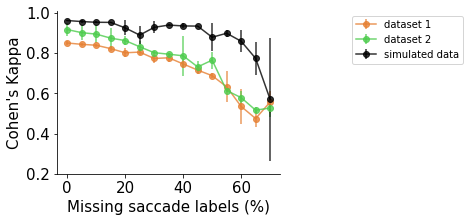

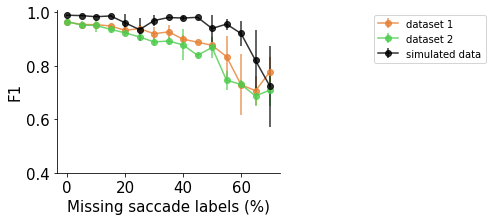

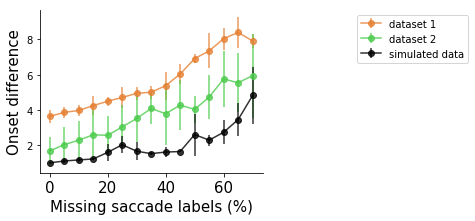

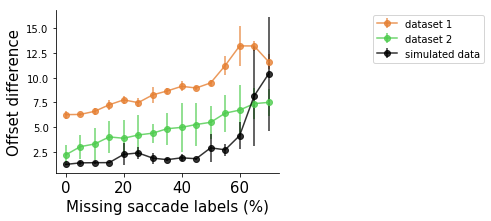

In [7]:
import numpy as np
from matplotlib.pyplot import *

cols = [[0.9,0.5,0.2],[0.3,0.8,0.3],'k']
labels = ['dataset 1', 'dataset 2', 'simulated data']


percent = np.arange(0,0.75,0.05)
rep = 3
cond = 3
Kappa = np.zeros((len(percent),rep,cond))
F1 = np.zeros((len(percent),rep,cond))
On = np.zeros((len(percent),rep,cond))
Off = np.zeros((len(percent),rep,cond))

for r in range(rep):
    for i,pc in enumerate(percent):
        perf = np.load('summary/noisy_labels/dataset1_percentremoved'+str(np.round(pc,2))+'_'+str(r)+'.npy')
        Kappa[i,r,0] = perf.item()['kappa']  
        F1[i,r,0] = perf.item()['f1']
        On[i,r,0] = np.mean(np.abs(perf.item()['on']))
        Off[i,r,0] = np.mean(np.abs(perf.item()['off']))
for r in range(rep):
    for i,pc in enumerate(percent):
        perf = np.load('summary/noisy_labels/dataset2_percentremoved'+str(np.round(pc,2))+'_'+str(r)+'.npy')
        Kappa[i,r,1] = perf.item()['kappa']  
        F1[i,r,1] = perf.item()['f1']
        On[i,r,1] = np.mean(np.abs(perf.item()['on']))
        Off[i,r,1] = np.mean(np.abs(perf.item()['off']))

for r in range(rep):
    for i,pc in enumerate(percent):
        perf = np.load('summary/noisy_labels/simulated_n300_percentremoved'+str(np.round(pc,2))+'_'+str(r)+'.npy')
        Kappa[i,r,2] = perf.item()['kappa']  
        F1[i,r,2] = perf.item()['f1']
        On[i,r,2] = np.mean(np.abs(perf.item()['on']))
        Off[i,r,2] = np.mean(np.abs(perf.item()['off']))

        
# PLOT
f = figure(figsize=(4,3))
ax = f.add_subplot(111)

for i in range(cond):
    y = Kappa[:,:,i]
    # error bar values
    yerr = np.nanstd(y,1)
    # plot
    ax.errorbar(percent, np.nanmean(y,1), yerr=yerr, fmt='o-',c=cols[i],capsize=0,label=labels[i],capthick=1,alpha=.8)


legend(bbox_to_anchor=(1.3,1))
xticks(np.arange(0,0.7,0.2),np.arange(0,70,20),fontsize=15)
yticks(np.arange(0.2,1.1,0.2),fontsize=15)
ylim(0.2,1.01)
xlabel('Missing saccade labels (%)',fontsize=15)
ylabel("Cohen's Kappa",fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
savefig('summary/noisy_labels_kappa_2.pdf',bbox_inches='tight')

show()


###### F1 ######
f = figure(figsize=(4,3))
ax = f.add_subplot(111)

for i in range(cond):
    y = F1[:,:,i]
    # error bar values
    yerr = np.nanstd(y,1)
    # plot
    ax.errorbar(percent, np.nanmean(y,1), yerr=yerr, fmt='o-',c=cols[i],capsize=0,label=labels[i],capthick=1,alpha=.8)

legend(bbox_to_anchor=(1.4,1))

xticks(np.arange(0,0.7,0.2),np.arange(0,70,20),fontsize=15)
yticks(np.arange(0.2,1.1,0.2),fontsize=15)
ylim(0.4,1.01)
xlabel('Missing saccade labels (%)',fontsize=15)
ylabel('F1',fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
savefig('summary/noisy_labels_f1_2.pdf',bbox_inches='tight')
show()



##### Onset ######
f = figure(figsize=(4,3))
ax = f.add_subplot(111)

for i in range(cond):
    y = On[:,:,i]
    # error bar values
    yerr = np.std(y,1)
    # plot
    ax.errorbar(percent, np.mean(y,1), yerr=yerr, fmt='o-',c=cols[i],capsize=0,label=labels[i],capthick=1,alpha=.8)

legend(bbox_to_anchor=(1.4,1))

xticks(np.arange(0,0.7,0.2),np.arange(0,70,20),fontsize=15)
xlabel('Missing saccade labels (%)',fontsize=15)
ylabel('Onset difference',fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
savefig('summary/noisy_labels_onset_2.pdf',bbox_inches='tight')
show()

##### Onset ######
f = figure(figsize=(4,3))
ax = f.add_subplot(111)

for i in range(cond):
    # Konstantin
    y = Off[:,:,i]
    # error bar values
    yerr = np.std(y,1)
    # plot
    ax.errorbar(percent, np.mean(y,1), yerr=yerr, fmt='o-',c=cols[i],capsize=0,label=labels[i],capthick=1,alpha=.8)

legend(bbox_to_anchor=(1.4,1))

xticks(np.arange(0,0.7,0.2),np.arange(0,70,20),fontsize=15)
xlabel('Missing saccade labels (%)',fontsize=15)
ylabel('Offset difference',fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_title('Simulated eye traces with label noise',fontsize=15)
savefig('summary/noisy_labels_offset_2.pdf',bbox_inches='tight')
show()



In [8]:
print("Average Kappa at "+str(percent[4])+" removed labels: "+ str(np.mean(Kappa[4,:,2])))
print("decrease: "+ str(np.mean(Kappa[0,:,2] - Kappa[4,:,2])) )
print("Average F1 at "+str(percent[4])+" removed labels: "+ str(np.mean(F1[4,:,2])))
print("decrease: "+ str(np.mean(F1[0,:,2] - F1[4,:,2])) )
print("Average onset distance at "+str(percent[4])+" removed labels: "+ str(np.mean(On[4,:,2])))
print("decrease: "+ str(np.mean(On[0,:,2] - On[4,:,2])))
print("Average onset distance at "+str(percent[4])+" removed labels: "+ str(np.mean(Off[4,:,2])))
print("decrease: "+ str(np.mean(Off[0,:,2] - Off[4,:,2])) )

Average Kappa at 0.2 removed labels: 0.9247297075645994
decrease: 0.03655082094297276
Average F1 at 0.2 removed labels: 0.9612456665042481
decrease: 0.02825691243446138
Average onset distance at 0.2 removed labels: 1.5981485892272485
decrease: -0.593846256420667
Average onset distance at 0.2 removed labels: 2.263353835254169
decrease: -1.012381230946332


# Runtime

In [1]:
import numpy as np
import time
import ueye

X = np.loadtxt('data/dataset1/dataset1_1000hz_X_train.csv',delimiter=',')
Y = np.loadtxt('data/dataset1/dataset1_1000hz_Y_train.csv',delimiter=',')
L = np.loadtxt('data/dataset1/dataset1_1000hz_Labels_train.csv',delimiter=',')



In [4]:
model = ueye.DNN(weights_name='crossvalidation/dataset2/crossvalidation_0',min_sacc_dist=10,min_sacc_dur=6)
t1 = time.time()
Pred,Prob = model.predict(X,Y)
t2 = time.time()
print('elapsed time per minute of data',(t2-t1)/X.shape[0]*60)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:1926: RuntimeWarning: invalid value encountered in subtract
  return a[slice1]-a[slice2]


elapsed time per minute of data 0.131958532333374
